In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
amazon=pd.read_excel('amazon_data.xlsx')
amazon

,$product id,product_name,category,discounted@price,actual price,discount_percentage,rating,rating_count,about_product,#user!id,user$name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â‚¹399,"â‚¹1,099",0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,â‚¹349,0.43,4,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,"â‚¹1,899",0.90,3.9,7928,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,â‚¹329,â‚¹699,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,â‚¹154,â‚¹399,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,â‚¹379,â‚¹919,0.59,4,1090,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"â‚¹2,280","â‚¹3,045",0.25,4.1,4118,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentio

In [3]:
amazon = amazon.rename(columns={'$product id': 'product_id'})
amazon = amazon.rename(columns={'discounted@price': 'discount_price'})
amazon = amazon.rename(columns={'#user!id': 'user_id'})
amazon = amazon.rename(columns={'user$name': 'user_name'})

In [4]:
amazon['discount_price'] = amazon['discount_price'].str.replace('â‚¹','')
amazon['actual price'] = amazon['actual price'].str.replace('â‚¹','')

In [5]:
split_categories = amazon['category'].str.split('|', expand=True)
split_categories.columns = [f'category_{i+1}' for i in range(split_categories.shape[1])]
amazon = pd.concat([amazon, split_categories], axis=1)
amazon=amazon.drop('category',axis=1)
amazon

,product_id,product_name,discount_price,actual price,discount_percentage,rating,rating_count,about_product,user_id,user_name,...,review_content,img_link,product_link,category_1,category_2,category_3,category_4,category_5,category_6,category_7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399,"1,099",0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...",...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199,349,0.43,4,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199,"1,899",0.90,3.9,7928,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...",...,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329,699,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",...,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154,399,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...",...,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379,919,0.59,4,1090,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...",...,"I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"2,280","3,045",0.25,4.1,4118,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...",...,"ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"2,219","3,080",0.28,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz..."

In [6]:
amazon = amazon.rename(columns={'actual price': 'actual_price'})
amazon.drop(columns=['img_link','product_link'])

,product_id,product_name,discount_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,category_1,category_2,category_3,category_4,category_5,category_6,category_7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399,"1,099",0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199,349,0.43,4,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199,"1,899",0.90,3.9,7928,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329,699,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154,399,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379,919,0.59,4,1090,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"2,280","3,045",0.25,4.1,4118,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"2,219","3,080",0.28,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLR

In [7]:
amazon['category_3']=amazon['category_3'].fillna(amazon['category_2'])

In [8]:
amazon['actual_price']=amazon['actual_price'].str.replace(',','').astype(float)

In [9]:
amazon['discount_price']=amazon['discount_price'].str.replace(',','').astype(float)

In [10]:
amazon['rating']=amazon['rating'].replace('|','0').bfill().astype(float)
amazon['rating_count']=amazon['rating_count'].astype(str).str.replace(',','').astype(float).ffill()

In [11]:
amazon.columns

Index(['product_id', 'product_name', 'discount_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'about_product',
       'user_id', 'user_name', 'review_id', 'review_title', 'review_content',
       'img_link', 'product_link', 'category_1', 'category_2', 'category_3',
       'category_4', 'category_5', 'category_6', 'category_7'],
      dtype='object')

In [12]:
amazon

,product_id,product_name,discount_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,...,review_content,img_link,product_link,category_1,category_2,category_3,category_4,category_5,category_6,category_7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...",...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...",...,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",...,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...",...,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...",...,"I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...",...,"ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Dani

## I. PRICING & DISCOUNT VISUALS

### Q1 : Plot the distribution of discounted prices.

<Axes: xlabel='discount_price', ylabel='Count'>

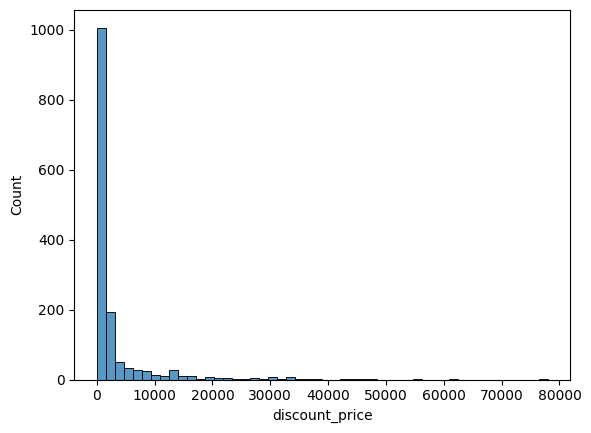

In [13]:
sns.histplot(amazon['discount_price'], bins=50)

### Q2 : Plot the distribution of actual prices.

<Axes: xlabel='actual_price', ylabel='Count'>

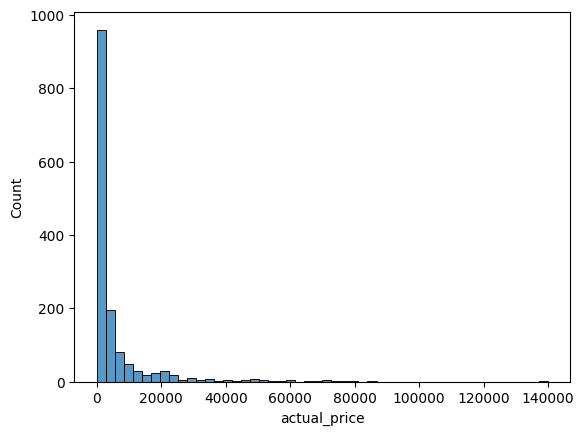

In [14]:
sns.histplot(amazon['actual_price'], bins=50)

### Q3 : Compare actual price vs discounted price using a scatter plot.

<Axes: xlabel='actual_price', ylabel='discount_price'>

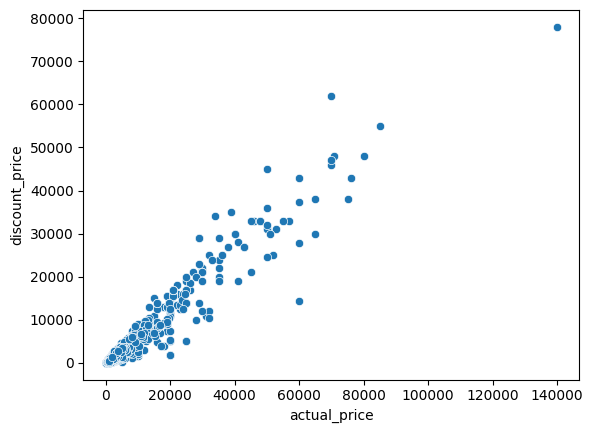

In [15]:
sns.scatterplot(data=amazon, x='actual_price', y='discount_price')

### Q4 : Visualize the discount percentage distribution.

<Axes: xlabel='discount_percentage', ylabel='Count'>

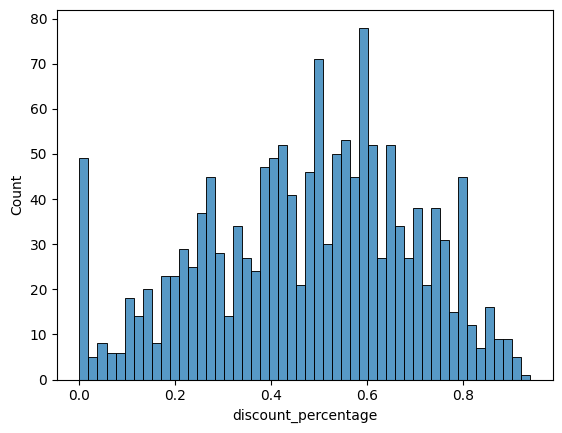

In [16]:
sns.histplot(amazon['discount_percentage'], bins=50)

### Q5 : Show average discount percentage by category.

<Axes: xlabel='discount_percentage', ylabel='category_1'>

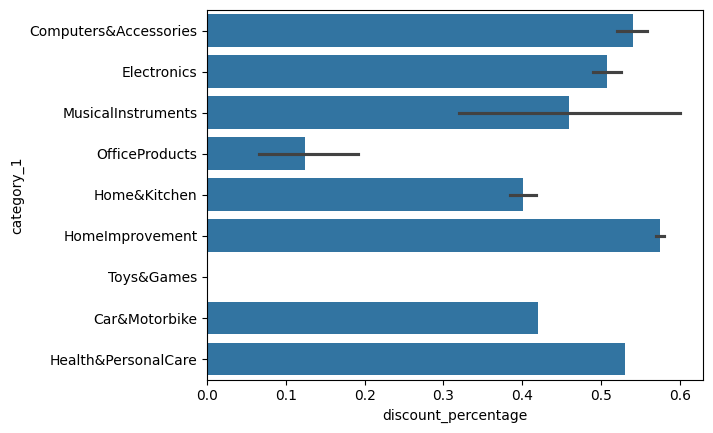

In [17]:
sns.barplot(data=amazon, y='category_1', x='discount_percentage', estimator='mean')

### Q6 : Plot top 10 products with highest discount percentage.

<Axes: ylabel='product_id'>

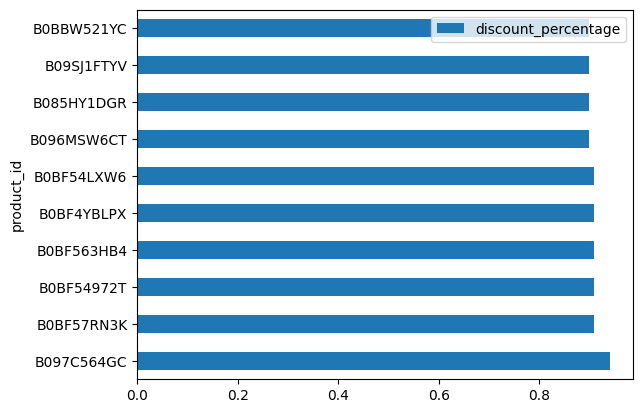

In [18]:
amazon.nlargest(10, 'discount_percentage').plot('product_id', 'discount_percentage', kind='barh')

### Q7 : Compare price ranges across top-level categories (boxplot).

<Axes: xlabel='actual_price', ylabel='category_1'>

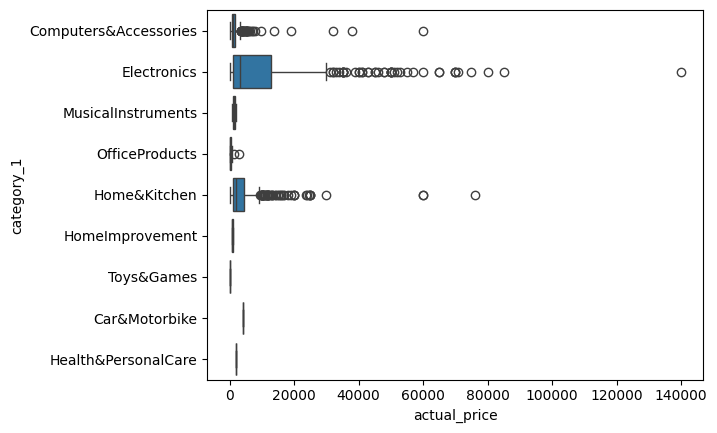

In [19]:
sns.boxplot(data=amazon, y='category_1', x='actual_price')

### Q8 : Visualize discount percentage vs actual price.

<Axes: xlabel='discount_percentage', ylabel='actual_price'>

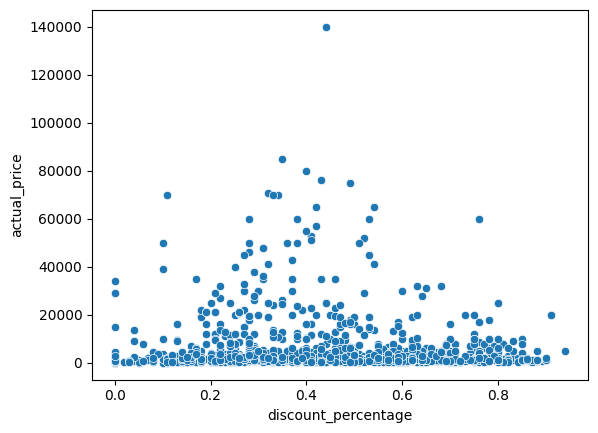

In [20]:
sns.scatterplot(data=amazon, x='discount_percentage', y='actual_price')

### Q9 : Plot discounted price vs rating.

<Axes: xlabel='discount_price', ylabel='rating'>

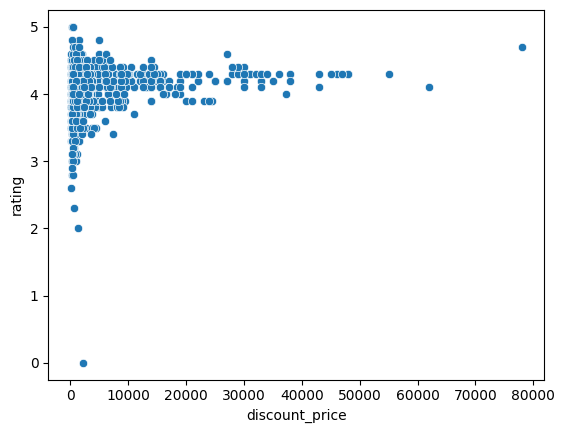

In [21]:
sns.scatterplot(data=amazon, x='discount_price', y='rating')

### Q10 : Show discount percentage vs rating count.

<Axes: xlabel='discount_percentage', ylabel='rating_count'>

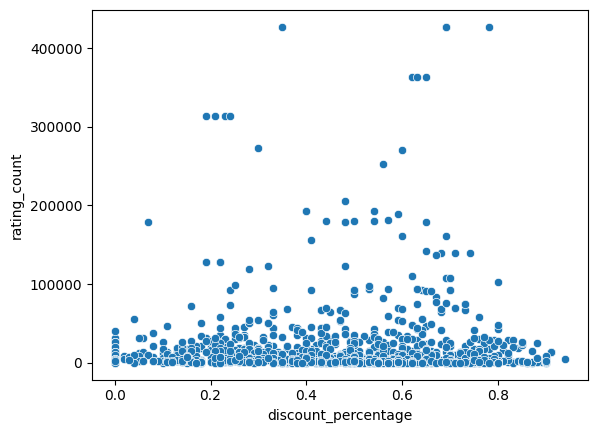

In [22]:
sns.scatterplot(data=amazon, x='discount_percentage', y='rating_count')

## II. RATINGS & REVIEWS VISUALS

### Q11 : Plot the distribution of product ratings.

<Axes: xlabel='rating', ylabel='Count'>

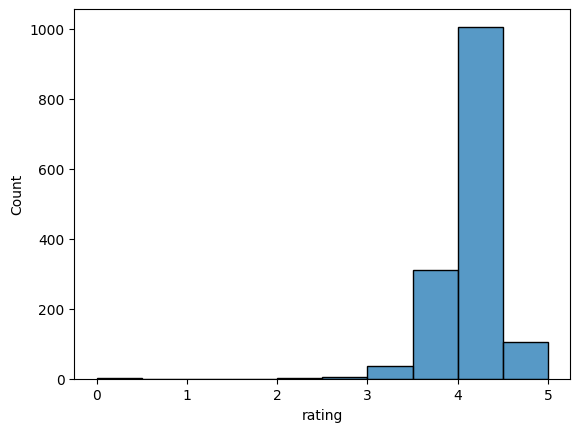

In [23]:
sns.histplot(amazon['rating'], bins=10)

### Q12 : Visualize rating count distribution (log scale if needed).

<Axes: xlabel='rating_count', ylabel='Count'>

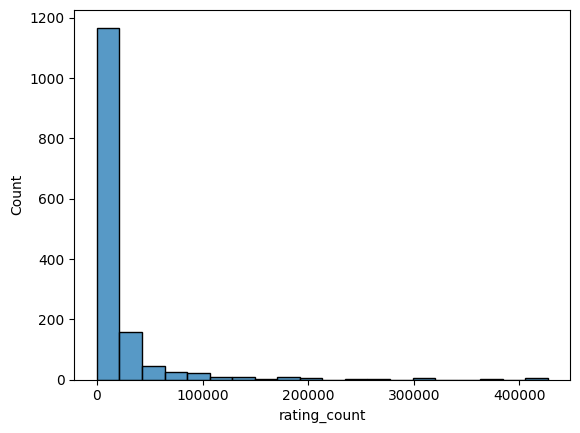

In [24]:
sns.histplot(amazon['rating_count'], bins=20)

### Q13 : Compare average rating by category.

<Axes: xlabel='rating', ylabel='category_1'>

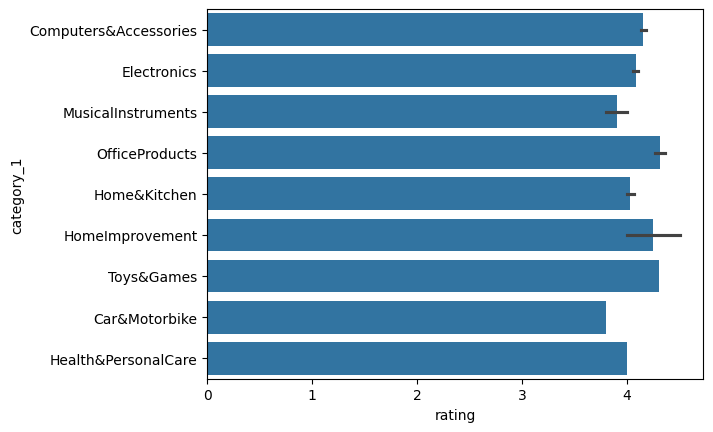

In [25]:
sns.barplot(data=amazon, y='category_1', x='rating', estimator='mean')

### Q14 : Show top 10 products by rating count.

<Axes: ylabel='product_name'>

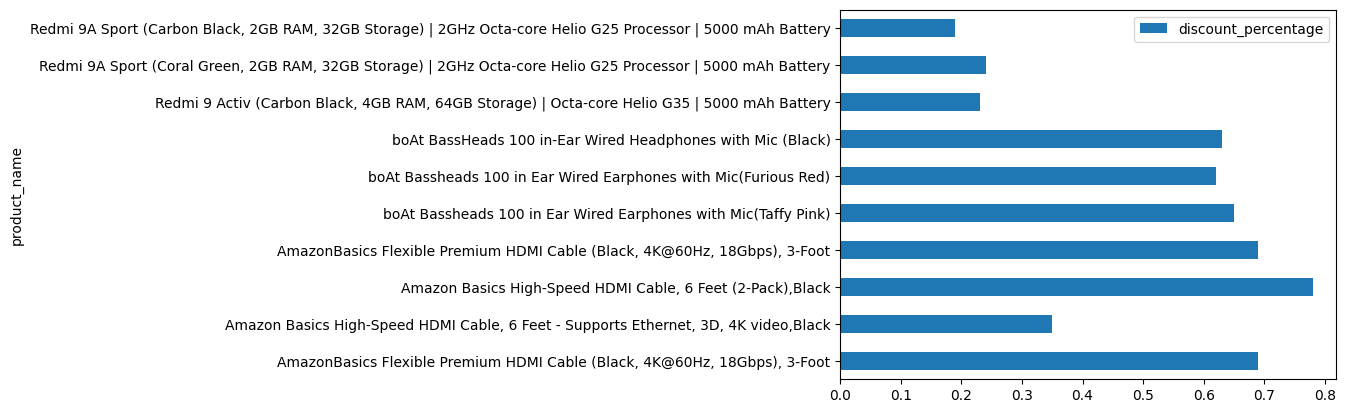

In [26]:
amazon.nlargest(10, 'rating_count').plot('product_name', 'discount_percentage', kind='barh')

### Q15 : Scatter plot of rating vs rating count.

<Axes: xlabel='rating', ylabel='rating_count'>

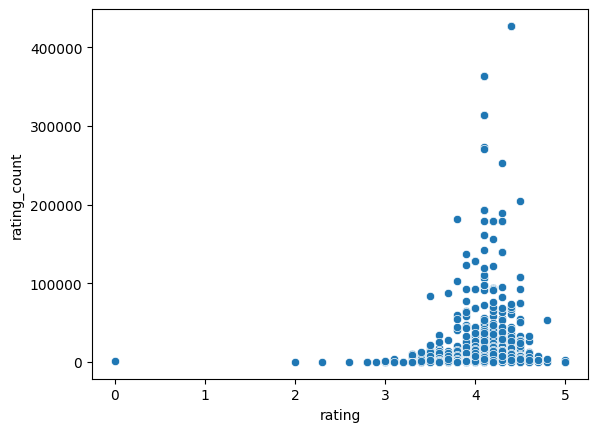

In [27]:
sns.scatterplot(data=amazon, x='rating', y='rating_count')

### Q16 : Plot rating vs discount percentage.

<Axes: xlabel='rating', ylabel='discount_percentage'>

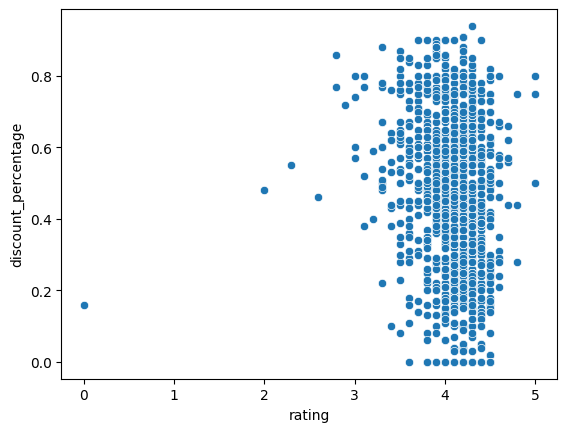

In [28]:
sns.scatterplot(data=amazon, x='rating', y='discount_percentage')

### Q17 : Boxplot of ratings across categories.

<Axes: xlabel='rating', ylabel='category_1'>

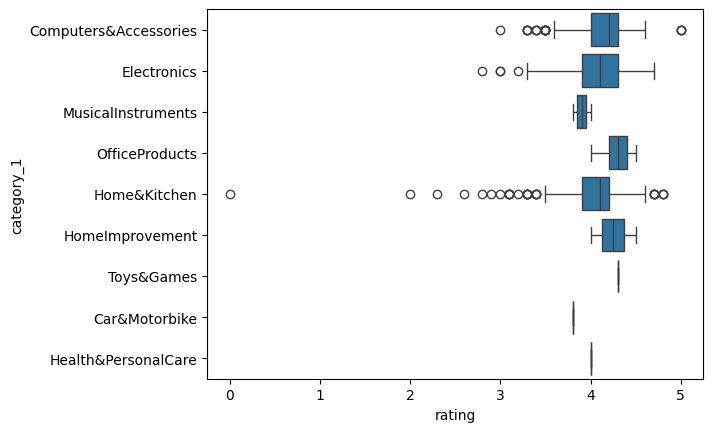

In [29]:
sns.boxplot(data=amazon, y='category_1', x='rating')

### Q18 : Heatmap showing correlation between numerical variables.

<Axes: >

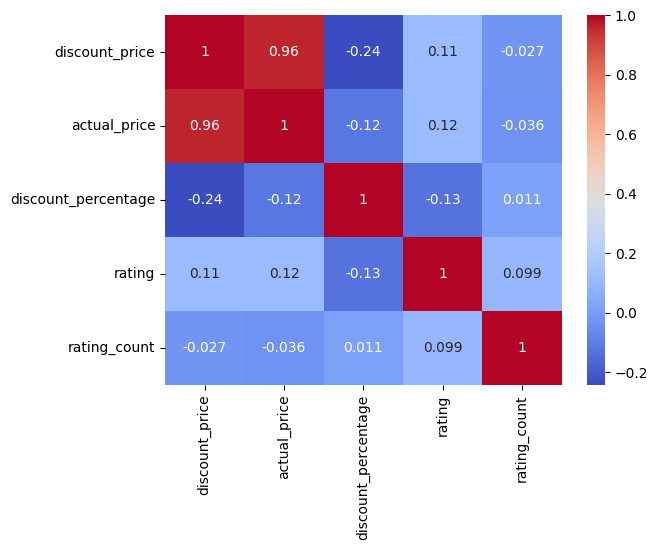

In [30]:
sns.heatmap(amazon[['discount_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]
    .corr(), annot=True, cmap='coolwarm')

### Q19 : Distribution of ratings for highly discounted products (>50%).

<Axes: xlabel='rating', ylabel='Count'>

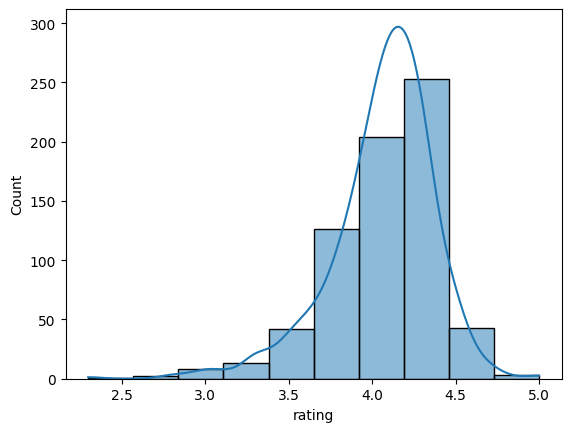

In [31]:
high_discount = amazon[amazon['discount_percentage']>0.50]
sns.histplot(data=high_discount, x='rating', bins=10, kde=True)

### Q20 : Compare ratings for low vs high price products.

In [32]:
low_price_threshold = amazon['discount_price'].quantile(0.33)
high_price_threshold = amazon['discount_price'].quantile(0.67)

amazon['price_segment'] = 'Mid Price'
amazon.loc[amazon['discount_price'] <= low_price_threshold, 'price_segment'] = 'Low Price'
amazon.loc[amazon['discount_price'] >= high_price_threshold, 'price_segment'] = 'High Price'

<Axes: xlabel='price_segment', ylabel='rating'>

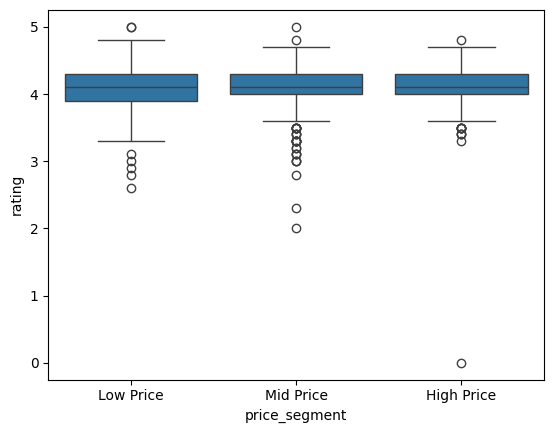

In [33]:
sns.boxplot(
    x='price_segment',
    y='rating',
    data=amazon,
    order=['Low Price', 'Mid Price', 'High Price']
)

## III. CATEGORY-BASED VISUALS

### Q21 : Bar plot of number of products per category.

<Axes: xlabel='count', ylabel='category_1'>

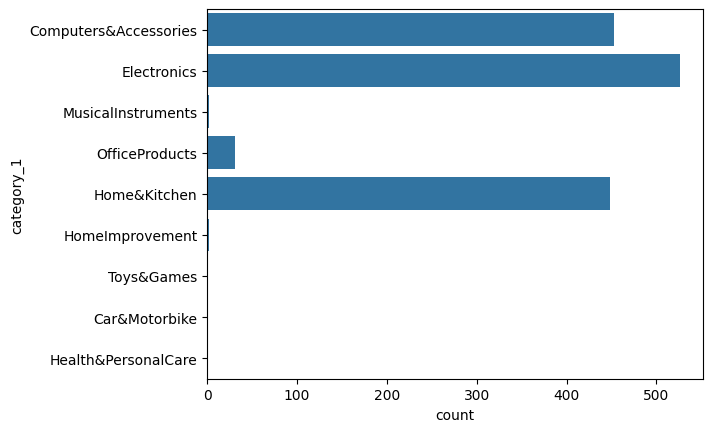

In [34]:
sns.countplot(data=amazon, y='category_1')

### Q22 : Plot average actual price by category.

<Axes: xlabel='actual_price', ylabel='category_1'>

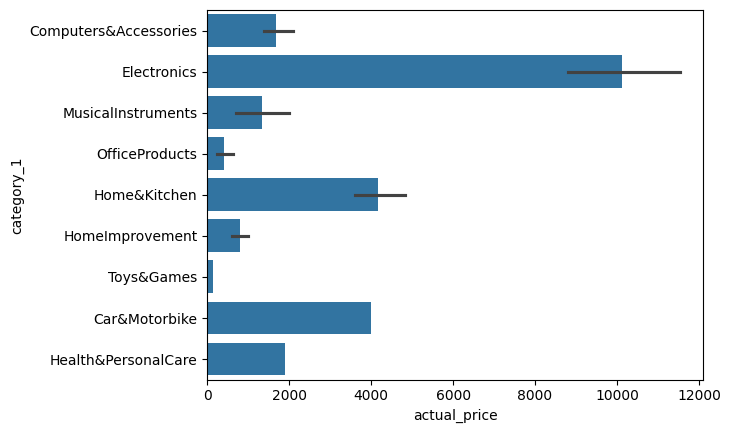

In [35]:
sns.barplot(data=amazon, y='category_1', x='actual_price', estimator='mean')

### Q23 : Plot average discounted price by category.

<Axes: xlabel='discount_price', ylabel='category_1'>

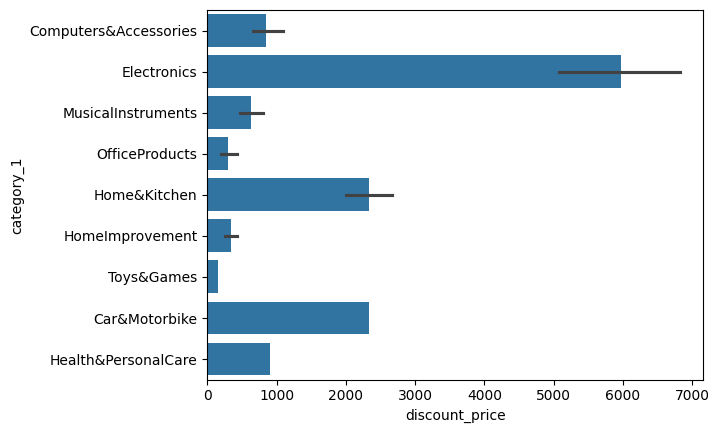

In [36]:
sns.barplot(data=amazon, y='category_1', x='discount_price', estimator='mean')

### Q24 : Show average rating by category.


<Axes: xlabel='rating', ylabel='category_1'>

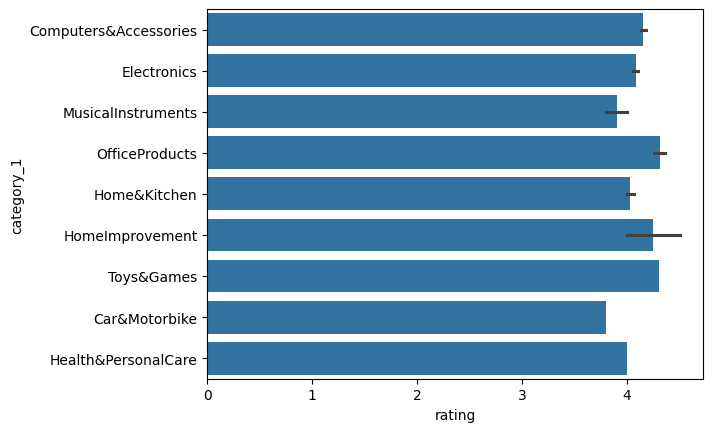

In [37]:
sns.barplot(data=amazon, y='category_1', x='rating', estimator='mean')

### Q25 : Visualize average discount percentage by category.

<Axes: xlabel='discount_percentage', ylabel='category_1'>

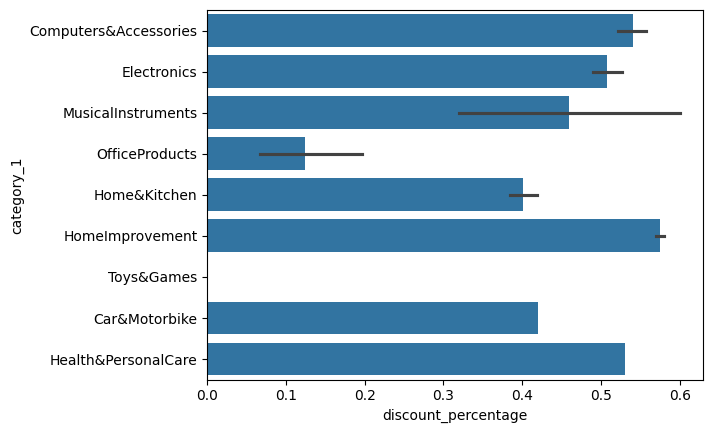

In [38]:
sns.barplot(data=amazon, y='category_1', x='discount_percentage', estimator='mean')

### Q26. Treemap-like bar chart of category contribution (count-based).

<Axes: xlabel='count', ylabel='category_1'>

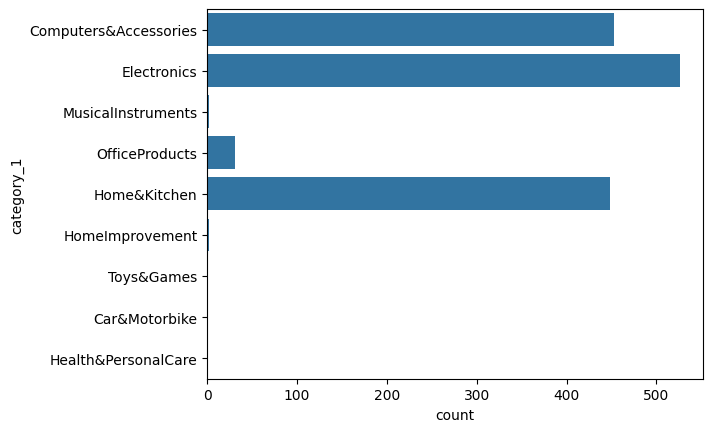

In [39]:
sns.countplot(data=amazon, y='category_1')

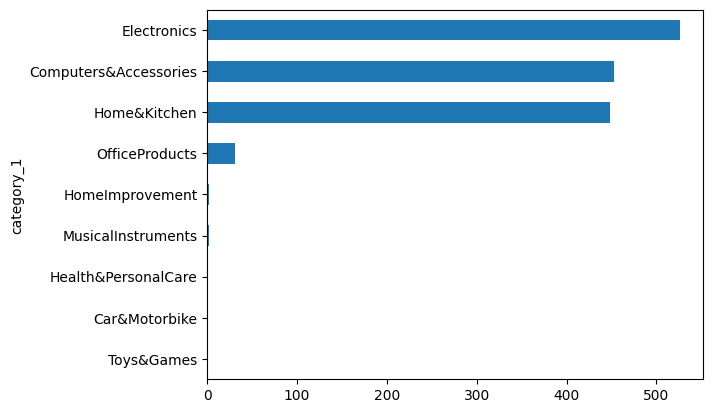

In [40]:
category_counts = amazon['category_1'].value_counts().sort_values().plot(kind='barh')

### Q27 : Compare rating count across categories.

<Axes: xlabel='rating_count', ylabel='category_1'>

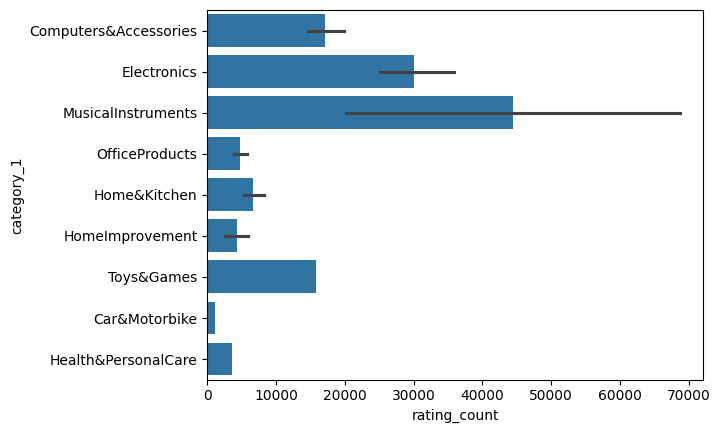

In [41]:
sns.barplot(data=amazon, y='category_1', x='rating_count')

### Q28 : Plot price spread within top 5 categories.

<Axes: ylabel='category_1'>

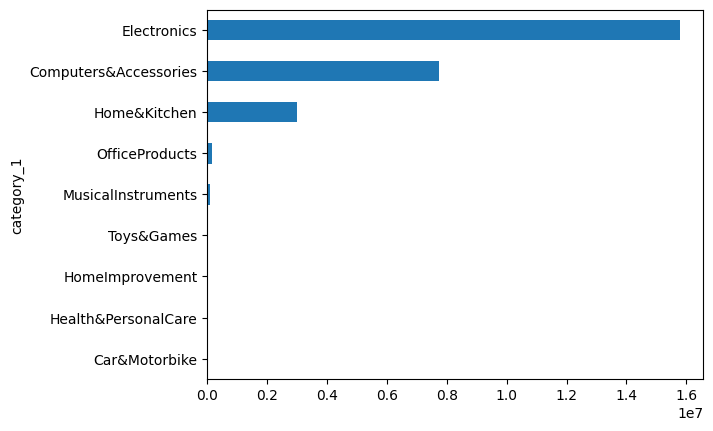

In [42]:
amazon.groupby('category_1')['rating_count'].sum().sort_values().plot(kind='barh')

### Q29 : Category-wise rating distribution (violin plot).

<Axes: xlabel='rating', ylabel='category_1'>

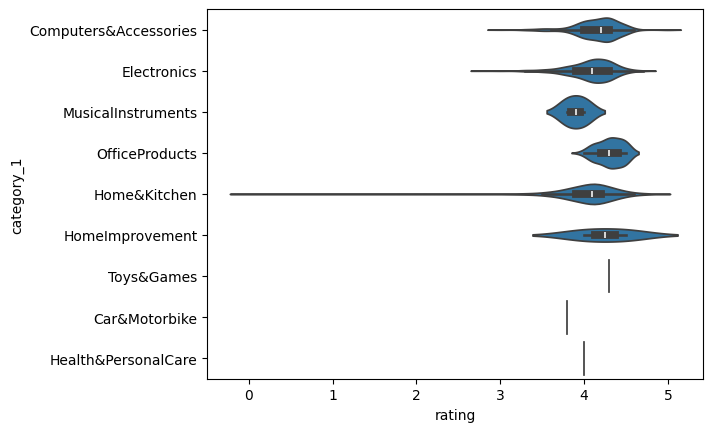

In [43]:
sns.violinplot(data=amazon, y='category_1', x='rating')

### Q30 : Top categories with highest average discounts.

<Axes: ylabel='category_1'>

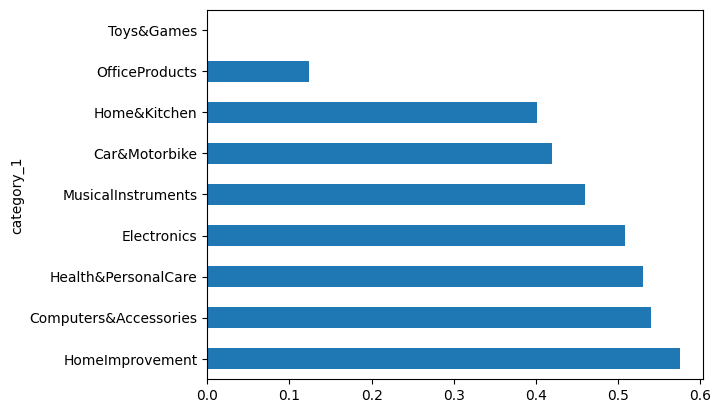

In [44]:
amazon.groupby('category_1')['discount_percentage'].mean().sort_values(ascending=False).head(10).plot(kind='barh')

## IV. TOP / BOTTOM PRODUCT ANALYSIS VISUALS

### Q31 : Top 10 most reviewed products.

<Axes: ylabel='product_name'>

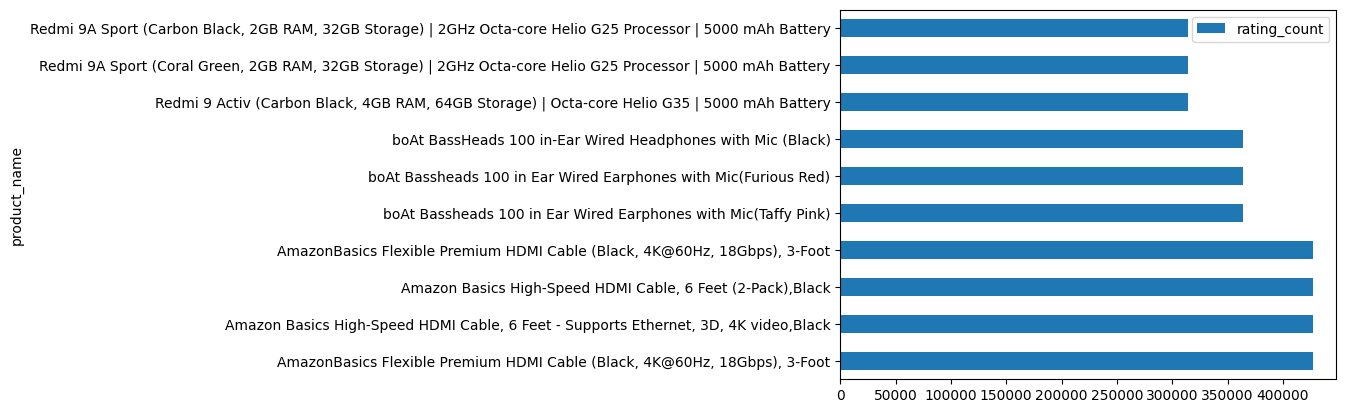

In [45]:
amazon.nlargest(10, 'rating_count').plot('product_name', 'rating_count', kind='barh')

### Q32 : Top 10 highest rated products (rating ≥ 4.5).

<Axes: ylabel='product_name'>

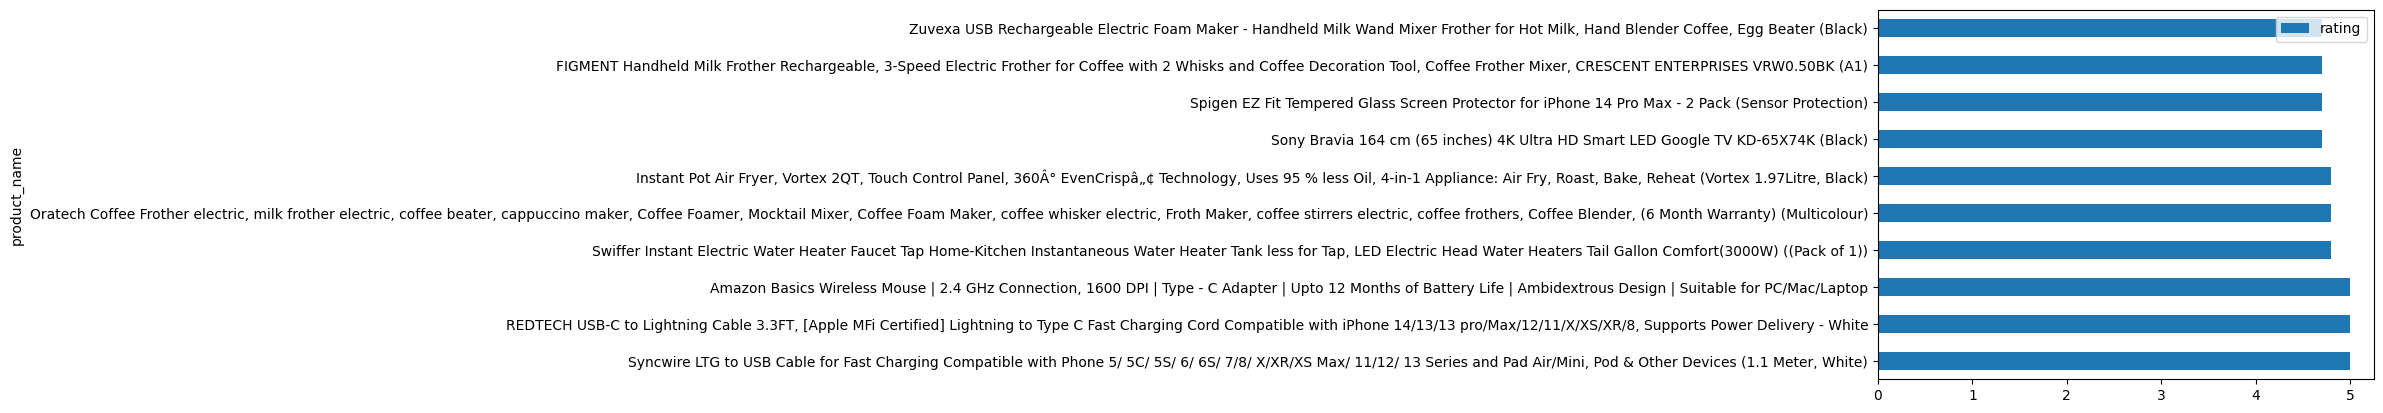

In [48]:
amazon[amazon['rating'] >= 4.5].nlargest(10, 'rating').plot('product_name', 'rating', kind='barh')

### Q33 : Bottom 10 lowest rated products.

<Axes: ylabel='product_name'>

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


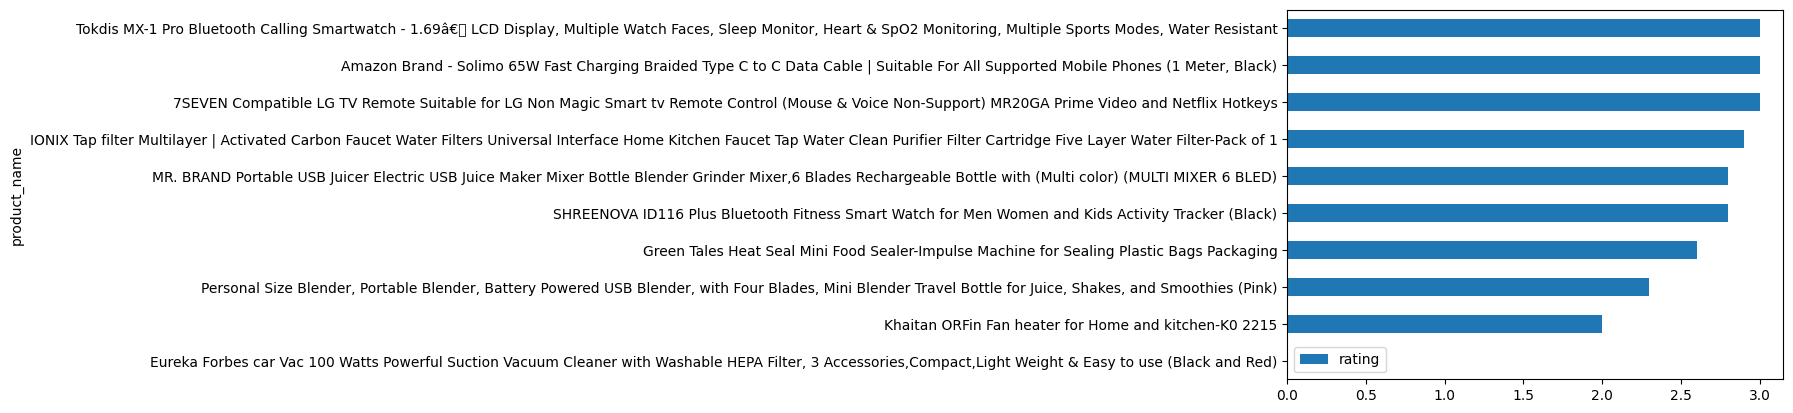

In [49]:
amazon.nsmallest(10, 'rating').plot('product_name', 'rating', kind='barh')

### Q34 : Products with high discount but low ratings.


<Axes: xlabel='discount_percentage', ylabel='rating'>

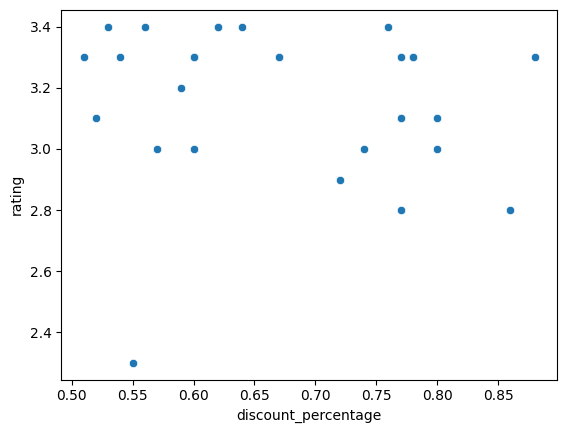

In [52]:
sns.scatterplot(data=amazon[(amazon['discount_percentage']>0.5) & (amazon['rating']<3.5)], 
                x='discount_percentage', y='rating')

### Q35 : Products with high ratings but low discounts.


<Axes: xlabel='discount_percentage', ylabel='rating'>

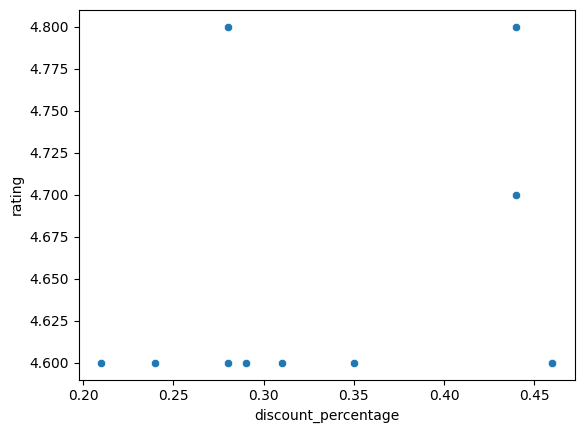

In [54]:
sns.scatterplot(data=amazon[(amazon['discount_percentage']<0.5) & (amazon['rating']>4.5)], 
                x='discount_percentage', y='rating')

### Q36 : Scatter plot of rating vs discounted price for top products.

<Axes: xlabel='discount_price', ylabel='rating'>

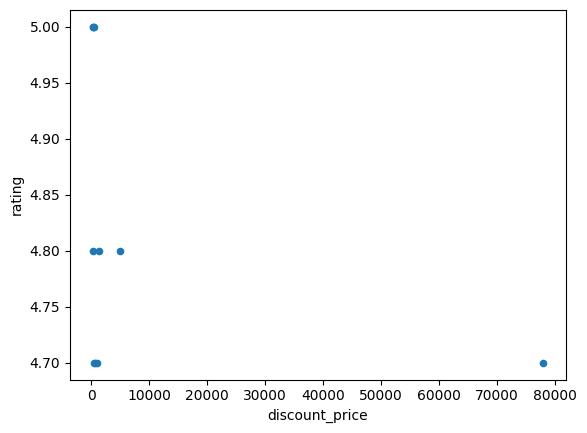

In [57]:
amazon[amazon['rating'] >= 4.5].nlargest(10, 'rating').plot('discount_price', 'rating', kind='scatter')

### Q37 : Bubble chart: rating vs price vs rating count.

<Axes: xlabel='rating', ylabel='actual_price'>

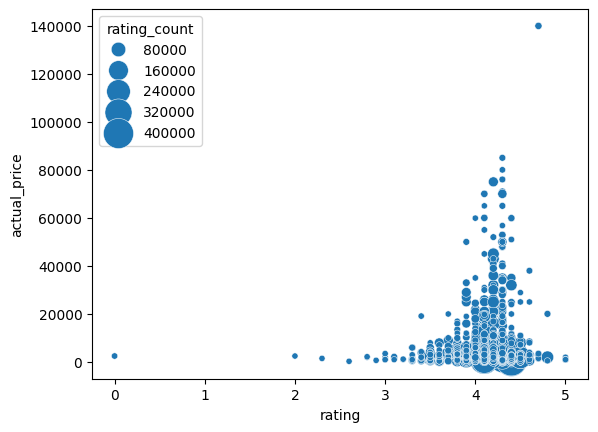

In [58]:
sns.scatterplot(data=amazon, x='rating', y='actual_price', size='rating_count', sizes=(20,500))

### Q38 : Plot review count concentration among products.

<Axes: xlabel='product_id', ylabel='rating_count'>

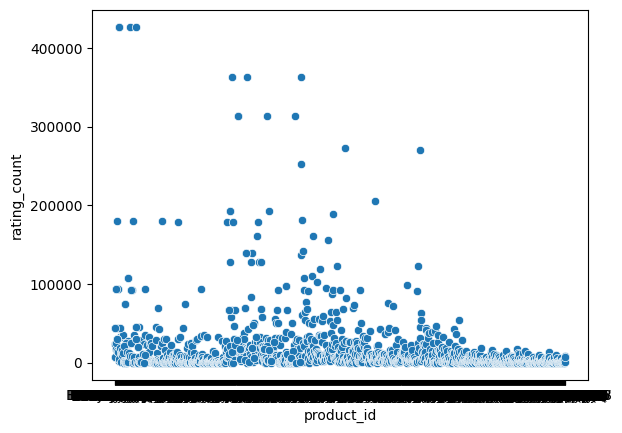

In [59]:
sns.scatterplot(data=amazon, x='product_id', y='rating_count', sizes=(20,500))

### Q39 : Distribution of rating counts for top-rated products.

<Axes: ylabel='product_name'>

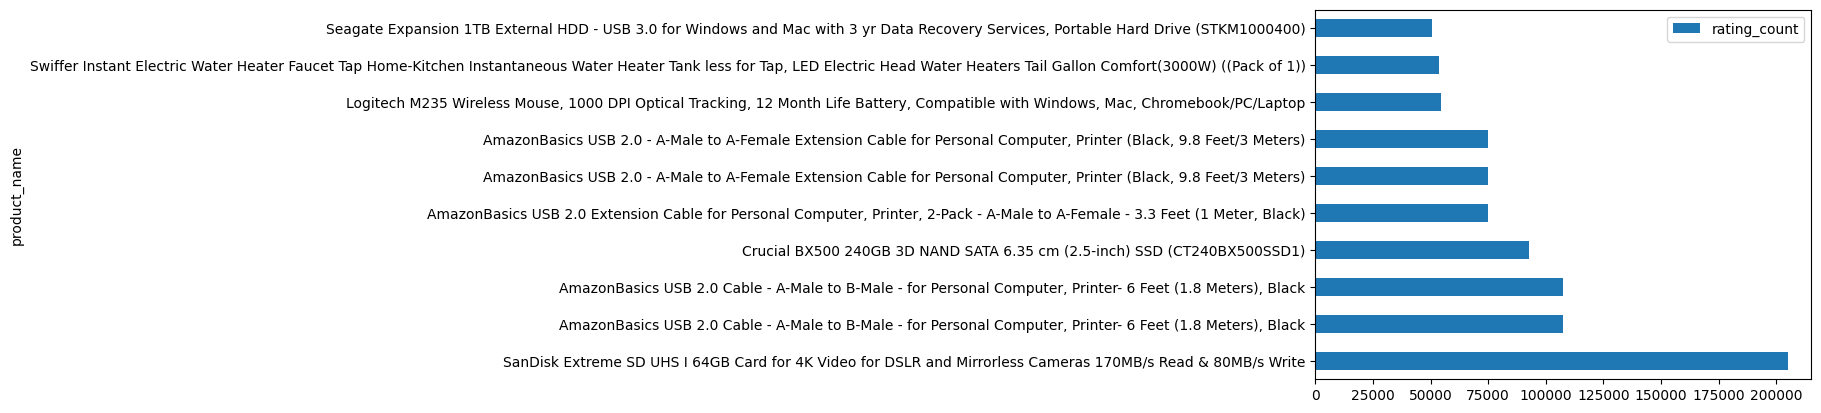

In [63]:
amazon[amazon['rating'] >= 4.5].nlargest(10, 'rating_count').plot('product_name', 'rating_count', kind='barh')

### Q40 : Compare price vs popularity (rating count).

<Axes: xlabel='rating_count', ylabel='actual_price'>

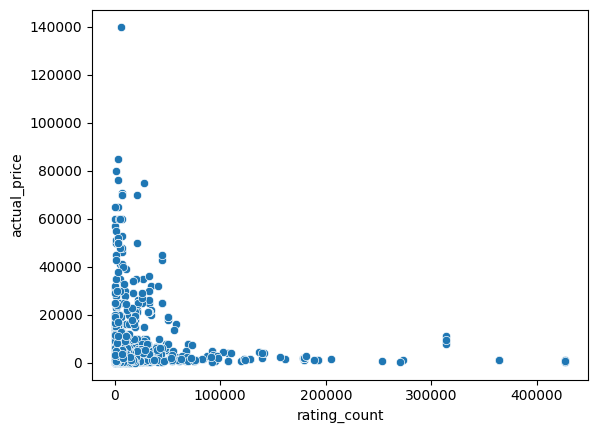

In [64]:
sns.scatterplot(data=amazon, x='rating_count', y='actual_price')

## V. TEXT / REVIEW-BASED VISUALS (NO NLP REQUIRED)

### Q41 : Bar plot of number of reviews per product.

<Axes: ylabel='product_name'>

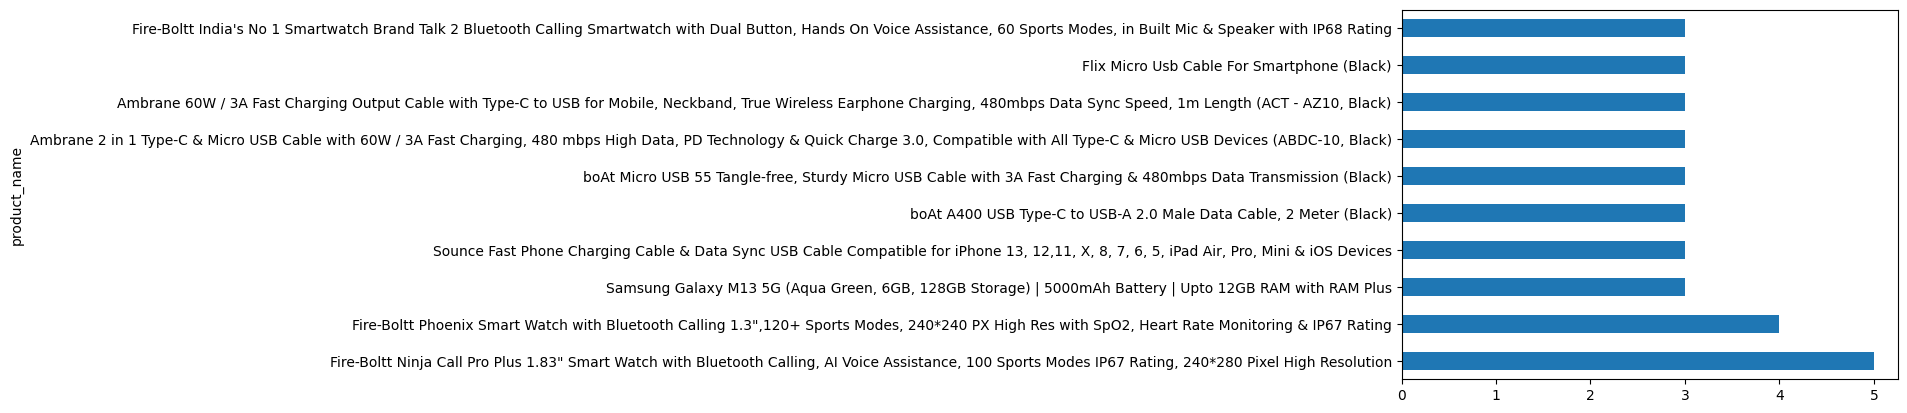

In [65]:
amazon.groupby('product_name').size().sort_values(ascending=False).head(10).plot(kind='barh')

### Q42 : Distribution of review title length.

In [66]:
amazon['review_title_length'] = amazon['review_title'].astype(str).apply(len)
amazon['review_content_length'] = amazon['review_content'].astype(str).apply(len)

<Axes: xlabel='review_title_length', ylabel='Count'>

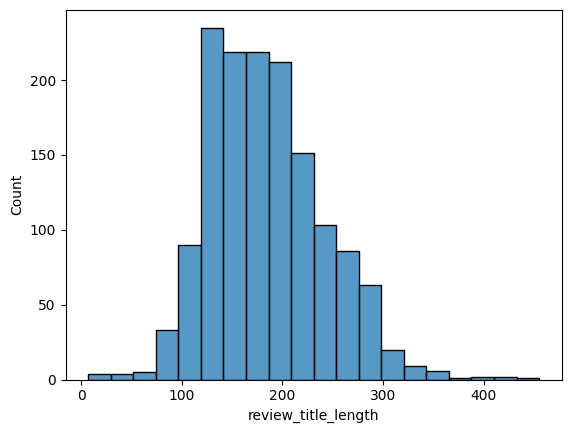

In [67]:
sns.histplot(amazon['review_title_length'], bins=20)

### Q43 : Distribution of review content length.


<Axes: xlabel='review_content_length', ylabel='Count'>

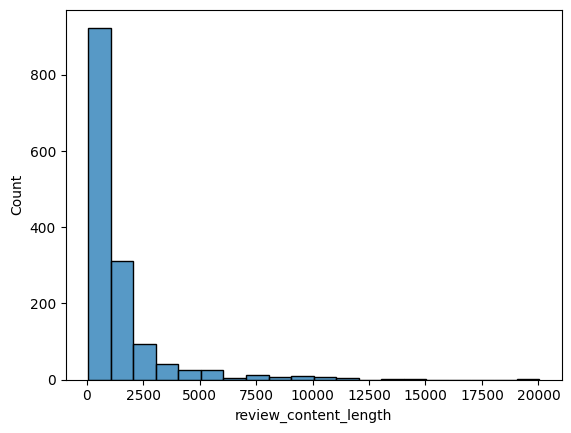

In [68]:
sns.histplot(amazon['review_content_length'], bins=20)

### Q44 : Compare review length vs rating.

<Axes: xlabel='rating', ylabel='review_title_length'>

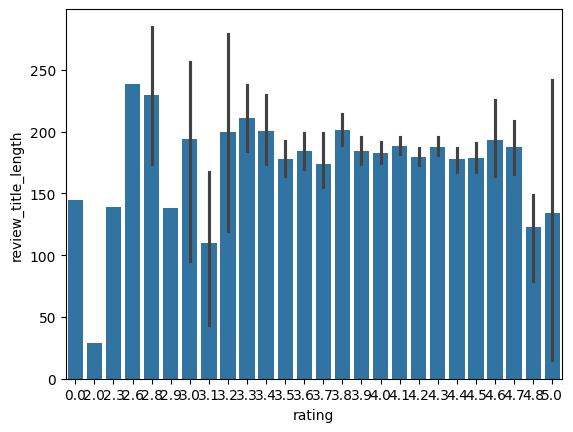

In [72]:
sns.barplot(data=amazon, x='rating', y='review_title_length')

### Q45 : Plot rating vs number of reviewers per product.

<Axes: xlabel='rating_count', ylabel='rating'>

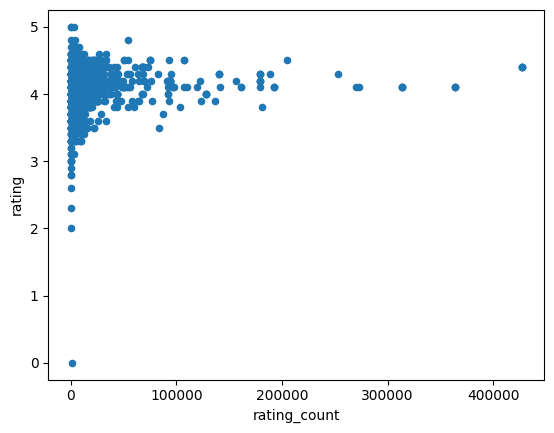

In [86]:
amazon[['product_name', 'rating', 'rating_count']].plot('rating_count', 'rating', kind='scatter')

### Q46 : Heatmap of review count vs rating buckets.


In [92]:
amazon['rating_bucket'] = pd.cut(amazon['rating'], bins=[0,2,3,4,5], labels=['Poor(<2)', 'Average(2-3)', 'Good(3-4)', 'Excellent(4-5)'])

In [93]:
amazon['rating_count_bucket'] = pd.cut(amazon['rating_count'], bins=[0,10,50,200, amazon['rating_count'].max()], labels=['Very Low', 'Low', 'Medium', 'High'])

In [95]:
heatmap_df = pd.pivot_table(amazon, values='product_name', index='rating_count_bucket', columns='rating_bucket', aggfunc='count', fill_value=0)

C:\Users\HP\AppData\Local\Temp\ipykernel_21848\4056098913.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_df = pd.pivot_table(amazon, values='product_name', index='rating_count_bucket', columns='rating_bucket', aggfunc='count', fill_value=0)


<Axes: xlabel='rating_bucket', ylabel='rating_count_bucket'>

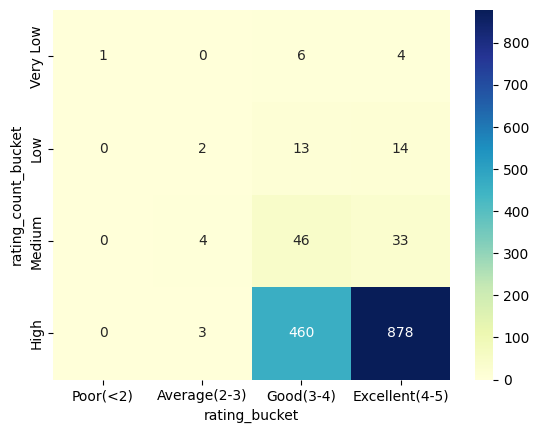

In [96]:
sns.heatmap(heatmap_df, annot=True, fmt='d', cmap='YlGnBu')

### Q47 : Average review length by rating.

<Axes: xlabel='rating', ylabel='review_title_length'>

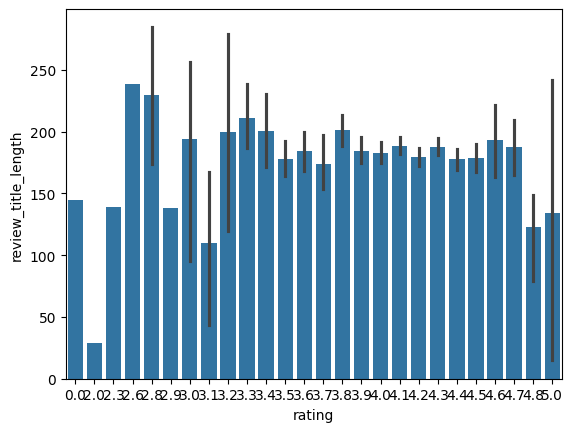

In [99]:
sns.barplot(data=amazon, x='rating', y='review_title_length', estimator='mean')

### Q48 : Top products with most unique reviewers.


<Axes: xlabel='product_name'>

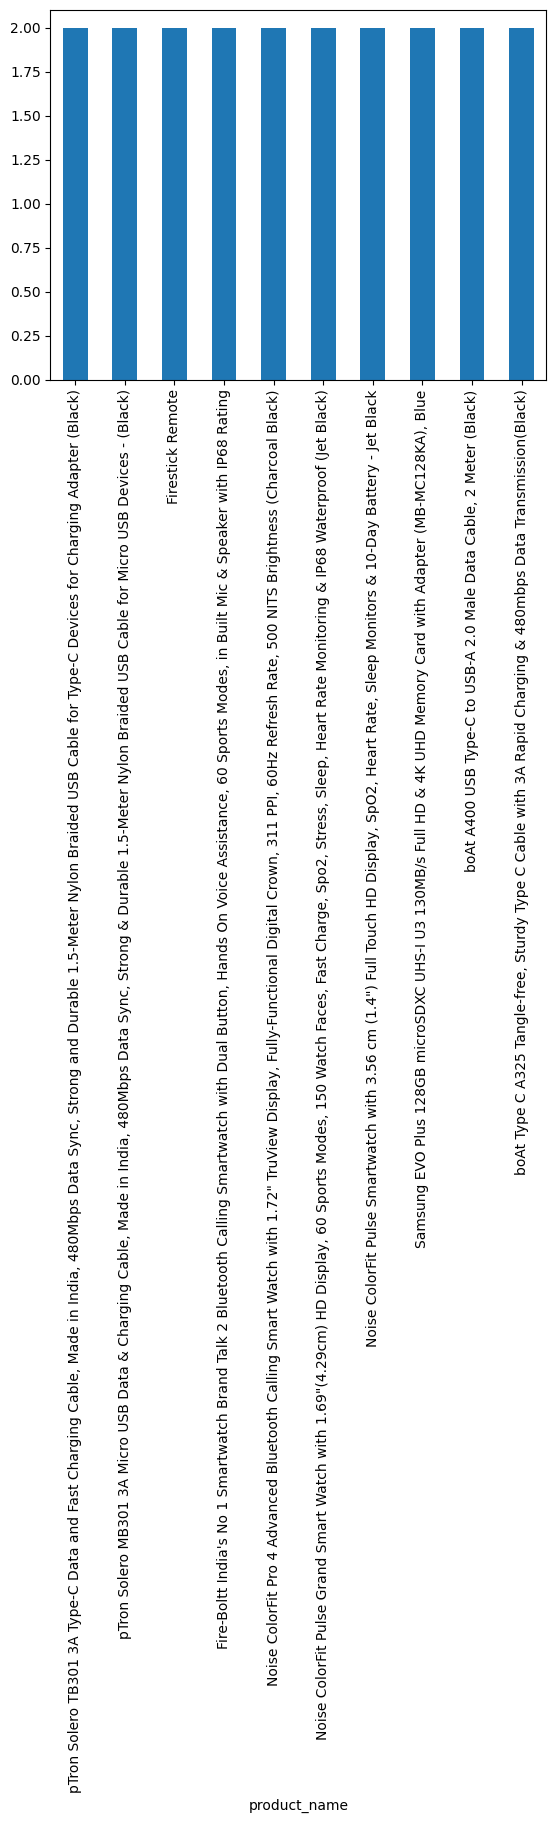

In [100]:
amazon.groupby('product_name')['review_id'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')

### Q49 : Relationship between review volume and rating stability.


C:\Users\HP\AppData\Local\Temp\ipykernel_21848\2198908581.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stability_data=amazon.groupby('rating_count_bucket')['rating'].agg(['mean','std','count']).reset_index().plot('rating_count_bucket', 'std', kind='bar')


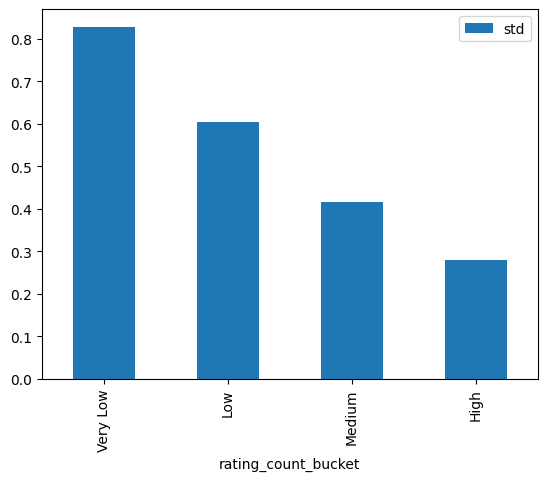

In [103]:
stability_data=amazon.groupby('rating_count_bucket')['rating'].agg(['mean','std','count'])
    .reset_index().plot('rating_count_bucket', 'std', kind='bar')

## VI. ADVANCED / PORTFOLIO-READY VISUALS

### Q51. Pairplot of price, discount, rating, rating count.

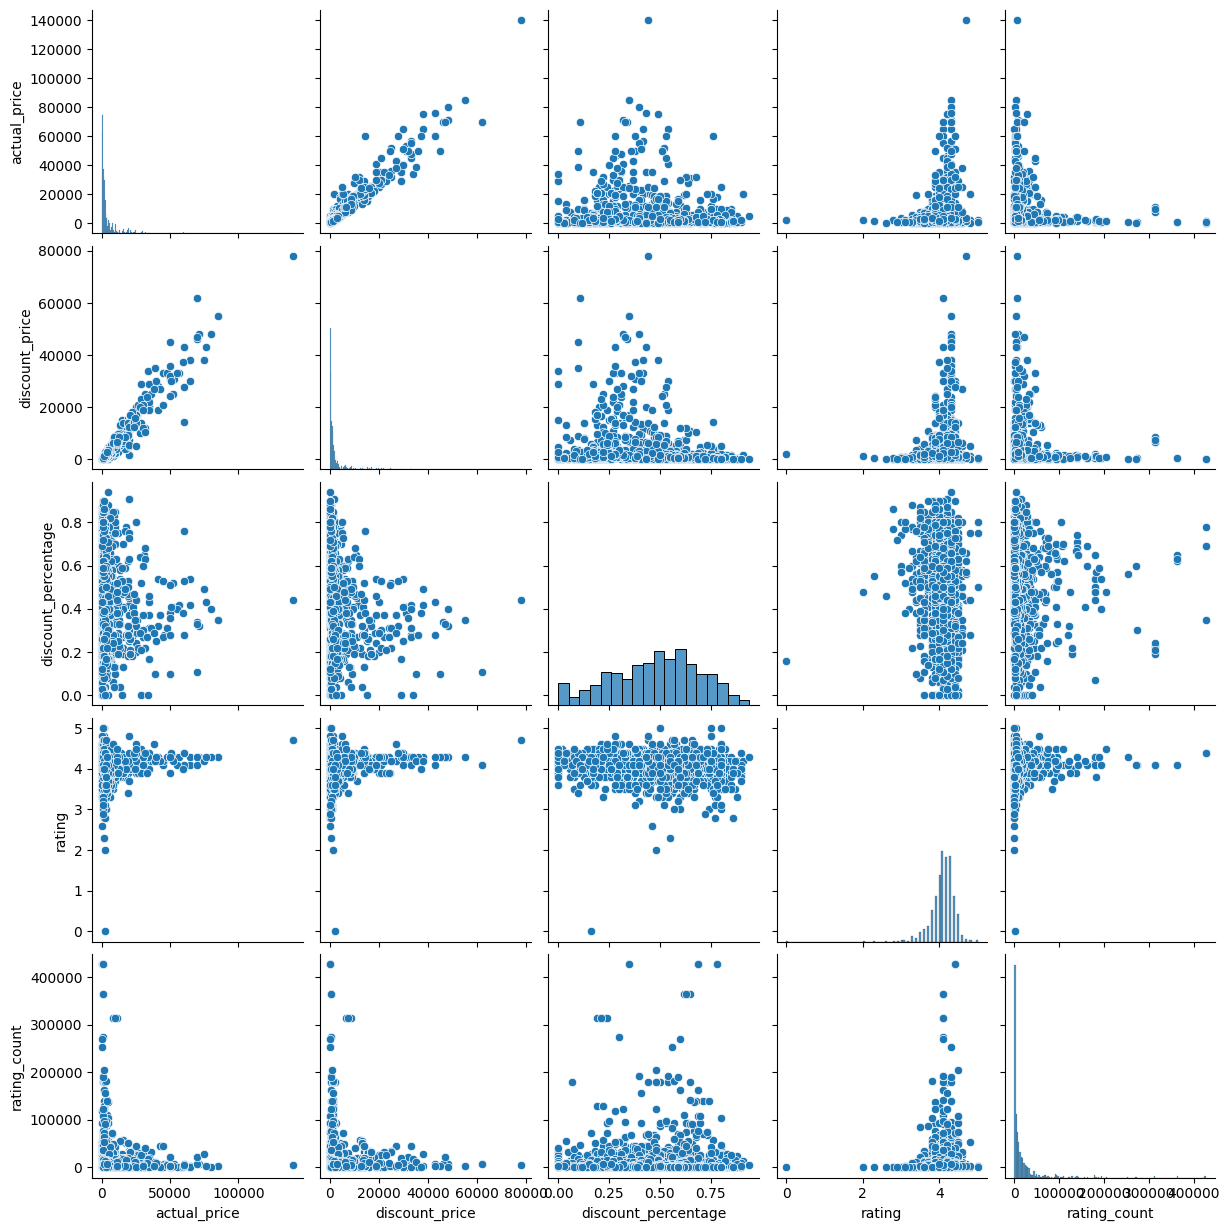

In [106]:
sns.pairplot(amazon[['actual_price','discount_price','discount_percentage','rating','rating_count']])

### Q52. KDE plot of discount percentage across categories.

C:\Users\HP\AppData\Local\Temp\ipykernel_21848\101447546.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=amazon, x='discount_percentage', hue='category_1')


<Axes: xlabel='discount_percentage', ylabel='Density'>

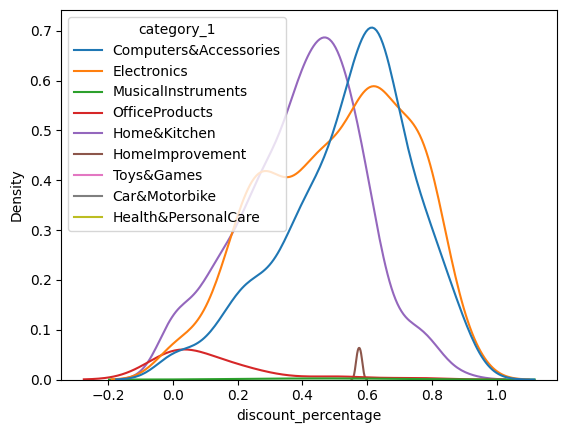

In [107]:
sns.kdeplot(data=amazon, x='discount_percentage', hue='category_1')

### Q53. FacetGrid of rating distributions by category.


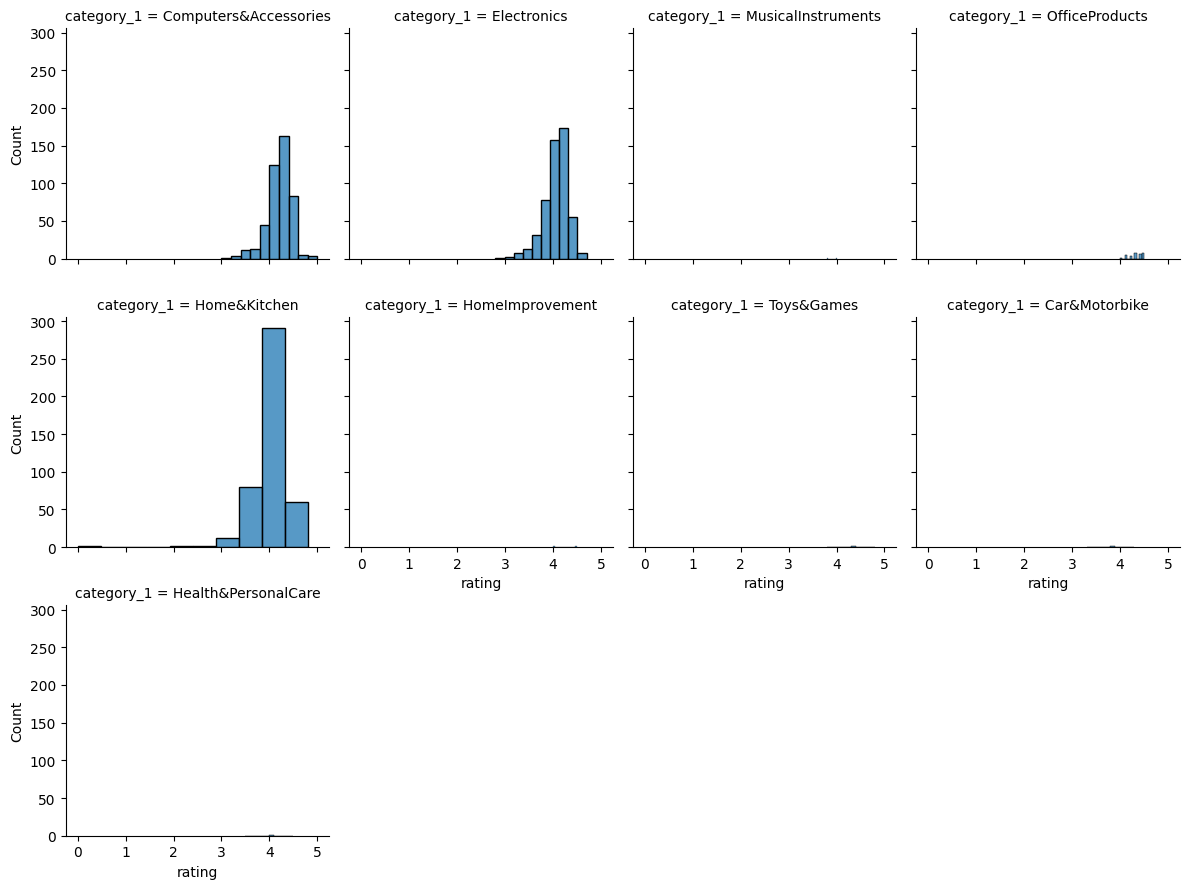

In [112]:
sns.FacetGrid(data=amazon, col='category_1', col_wrap=4, height=3).map_dataframe(sns.histplot, x='rating', bins=10)

### Q54. Outlier detection in pricing using boxplots.

<Axes: xlabel='actual_price'>

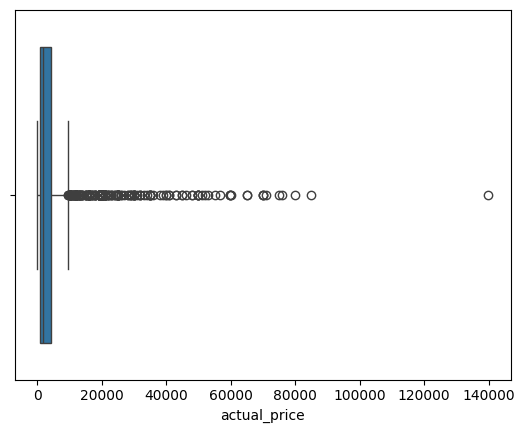

In [113]:
sns.boxplot(data=amazon, x='actual_price')

### Q55. Trend of rating with increasing discount bins.

In [115]:
amazon['discount_bucket'] = pd.cut(amazon['discount_percentage'], bins=[0,10,30,50,70,100], labels=['0-10','10-30','30-50','50-70-','70+'])

In [120]:
discount_trend=amazon.groupby('discount_bucket')['rating'].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_21848\3968710357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_trend=amazon.groupby('discount_bucket')['rating'].mean()


<Axes: xlabel='discount_bucket'>

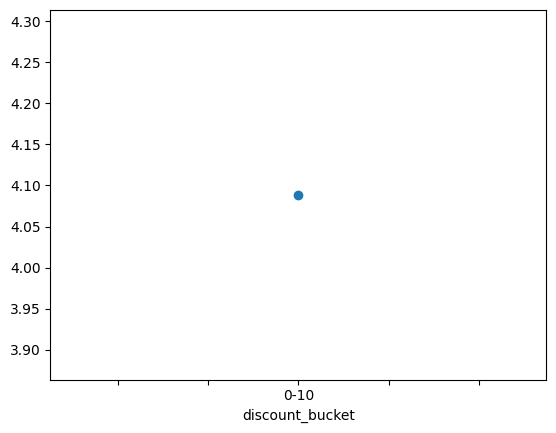

In [122]:
discount_trend.plot(kind='line', marker='o')

### Q56 : Price segmentation visual (low, medium, high).

In [123]:
amazon['price_segment']=pd.qcut(amazon['discount_price'], q=3, labels=['Low','Medium','High'])

<Axes: xlabel='price_segment', ylabel='rating'>

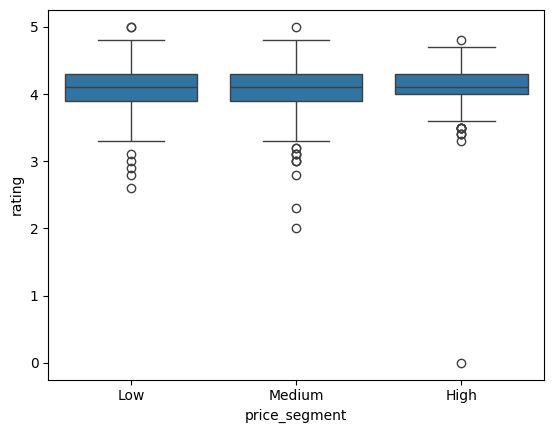

In [124]:
sns.boxplot(data=amazon, x='price_segment', y='rating')

### Q57 : Discount segmentation vs rating visualization.

In [125]:
amazon['discount_segment']=pd.qcut(amazon['discount_percentage'], q=3, labels=['Low','Medium','High'])

<Axes: xlabel='discount_segment', ylabel='rating'>

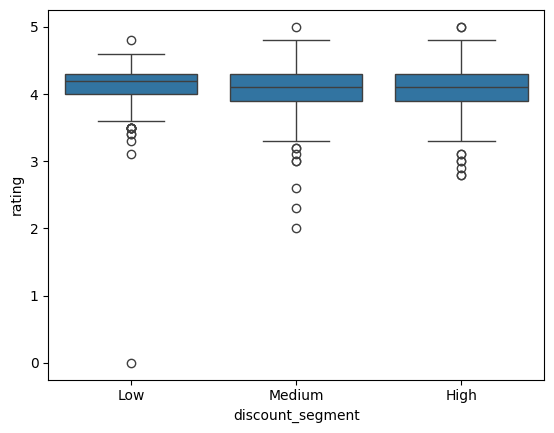

In [126]:
sns.boxplot(data=amazon, x='discount_segment', y='rating')

### Q58 : Countplot of rating buckets (1–5).

<Axes: xlabel='rating', ylabel='count'>

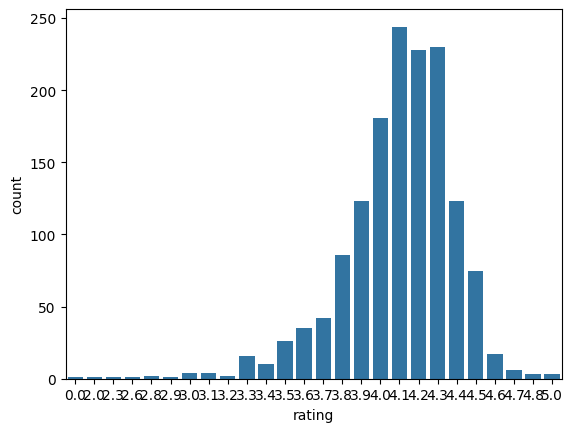

In [128]:
sns.countplot(data=amazon, x='rating')

### Q59 : Jointplot of price vs rating.

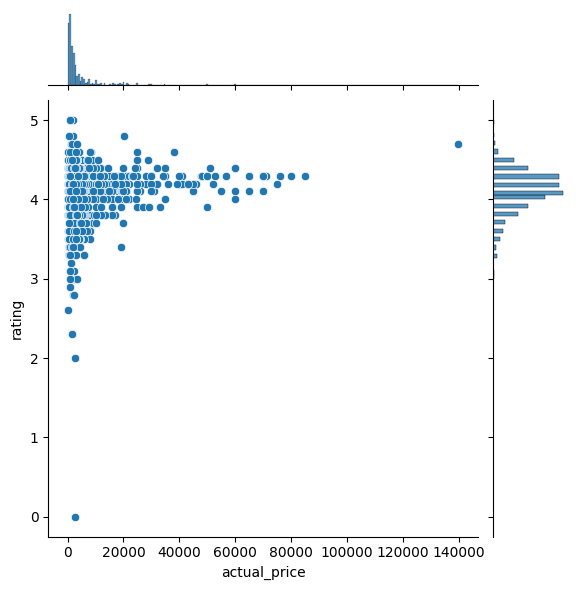

In [129]:
sns.jointplot(data=amazon, x='actual_price', y='rating')

### Q60 : Business dashboard-style combination of price, rating & discount.

<Axes: xlabel='discount_price', ylabel='rating'>

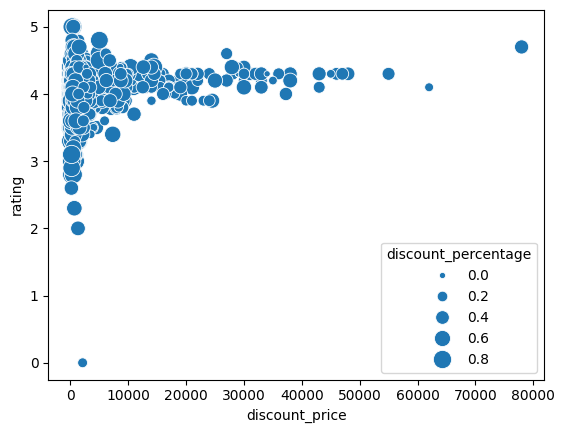

In [130]:
sns.scatterplot(data=amazon, x='discount_price', y='rating', size='discount_percentage', sizes=(20,200))